#### Обработка данных

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pymc3 import  *

%matplotlib inline

In [3]:
from scipy import optimize as opt 
import scipy
import scipy.odr as odr

In [4]:
import plotly.plotly as py
import plotly.graph_objs as go

In [5]:
data1 = pd.read_csv('data/experiment1.csv')
data2 = pd.read_csv('data/experiment2.csv')
data3 = pd.read_csv('data/experiment3.csv')
data4 = pd.read_csv('data/experiment4.csv')
data5 = pd.read_csv('data/experiment5.csv')

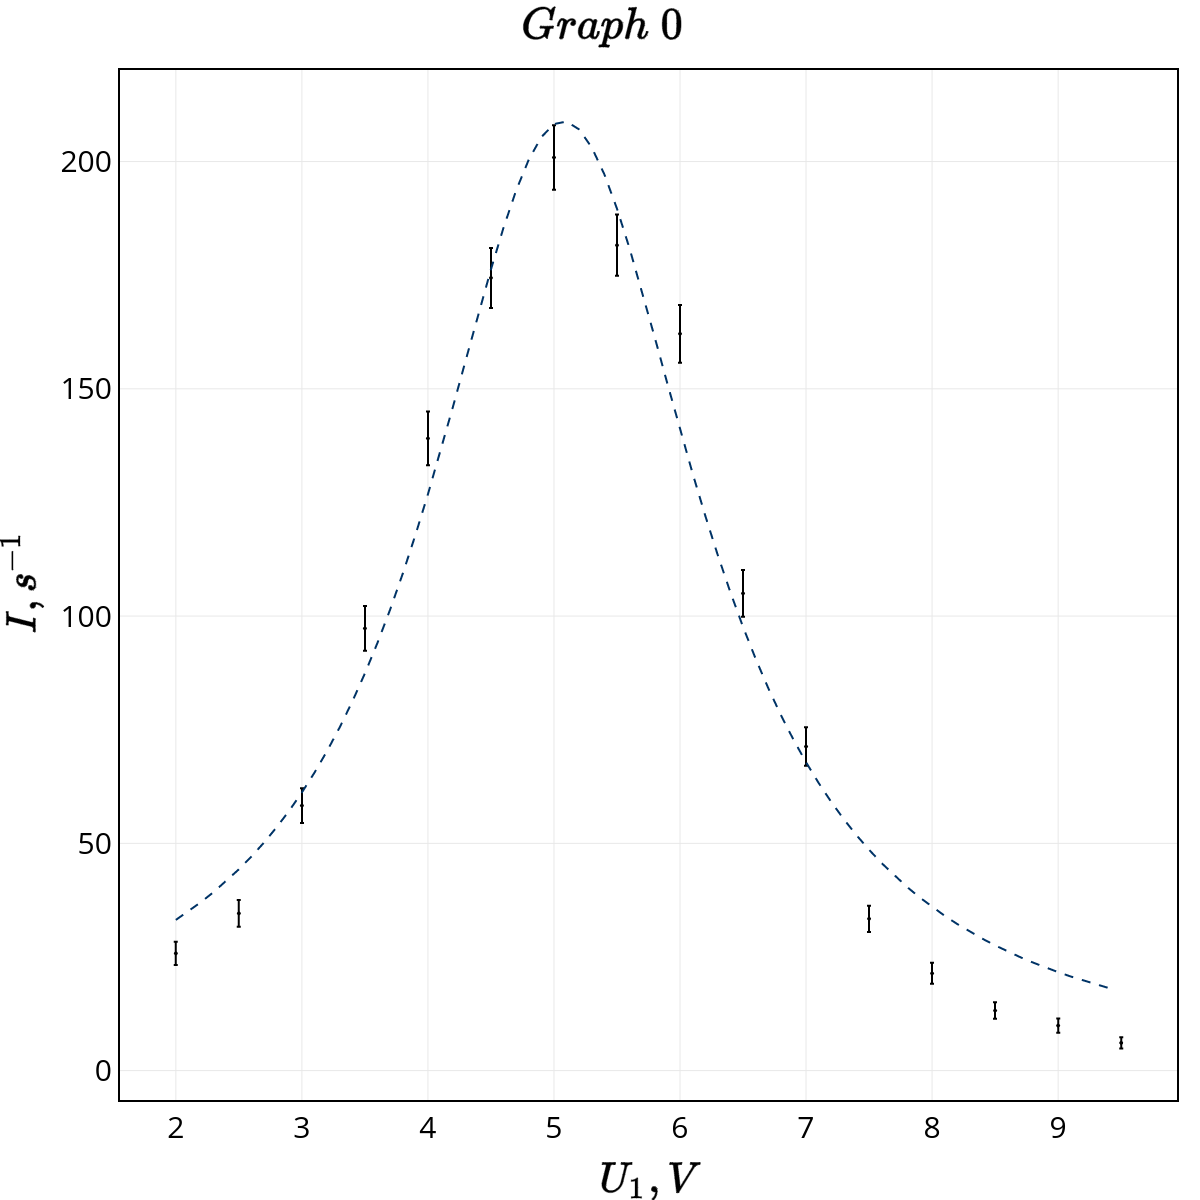

In [136]:
trace1 = go.Scatter(
    x = data1['U'].as_matrix()[4:],
    y = data1['I'].as_matrix()[4:],
    mode = 'markers',
    error_y = dict(
        type = 'data',
        array = np.sqrt(data1['I'].as_matrix()[4:]) * 0.5,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = np.arange(data1['U'].as_matrix()[4:].min(), data1['U'].as_matrix()[4:].max(), 0.1),
    y = f(np.arange(data1['U'].as_matrix()[4:].min(), data1['U'].as_matrix()[4:].max(), 0.1)
          , parameters_opt_1[0], parameters_opt_1[1], parameters_opt_1[2]),
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2]

layout = go.Layout(
    title = "$Graph~0$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$U_1, V$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$I, s^{-1}$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot1.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot1.png", width=500)

In [135]:
Y = np.reshape(data1['I'].as_matrix()[4:], (1, len(data1['I'].as_matrix()[4:])))
X = np.reshape(data1['U'].as_matrix()[4:], (1, len(data1['U'].as_matrix()[4:])))
def f(x, a, b, c):
    return a / (np.square(x - b) + a * c)
parameters_opt_1, parameters_cov_1 = opt.curve_fit(f, X[0], Y[0])
print(parameters_opt_1)
print(np.sqrt(np.diag(parameters_cov_1)))

[  3.72489035e+02   5.07444171e+00   4.78726805e-03]
[  3.62257571e+01   5.43257681e-02   1.96491805e-04]


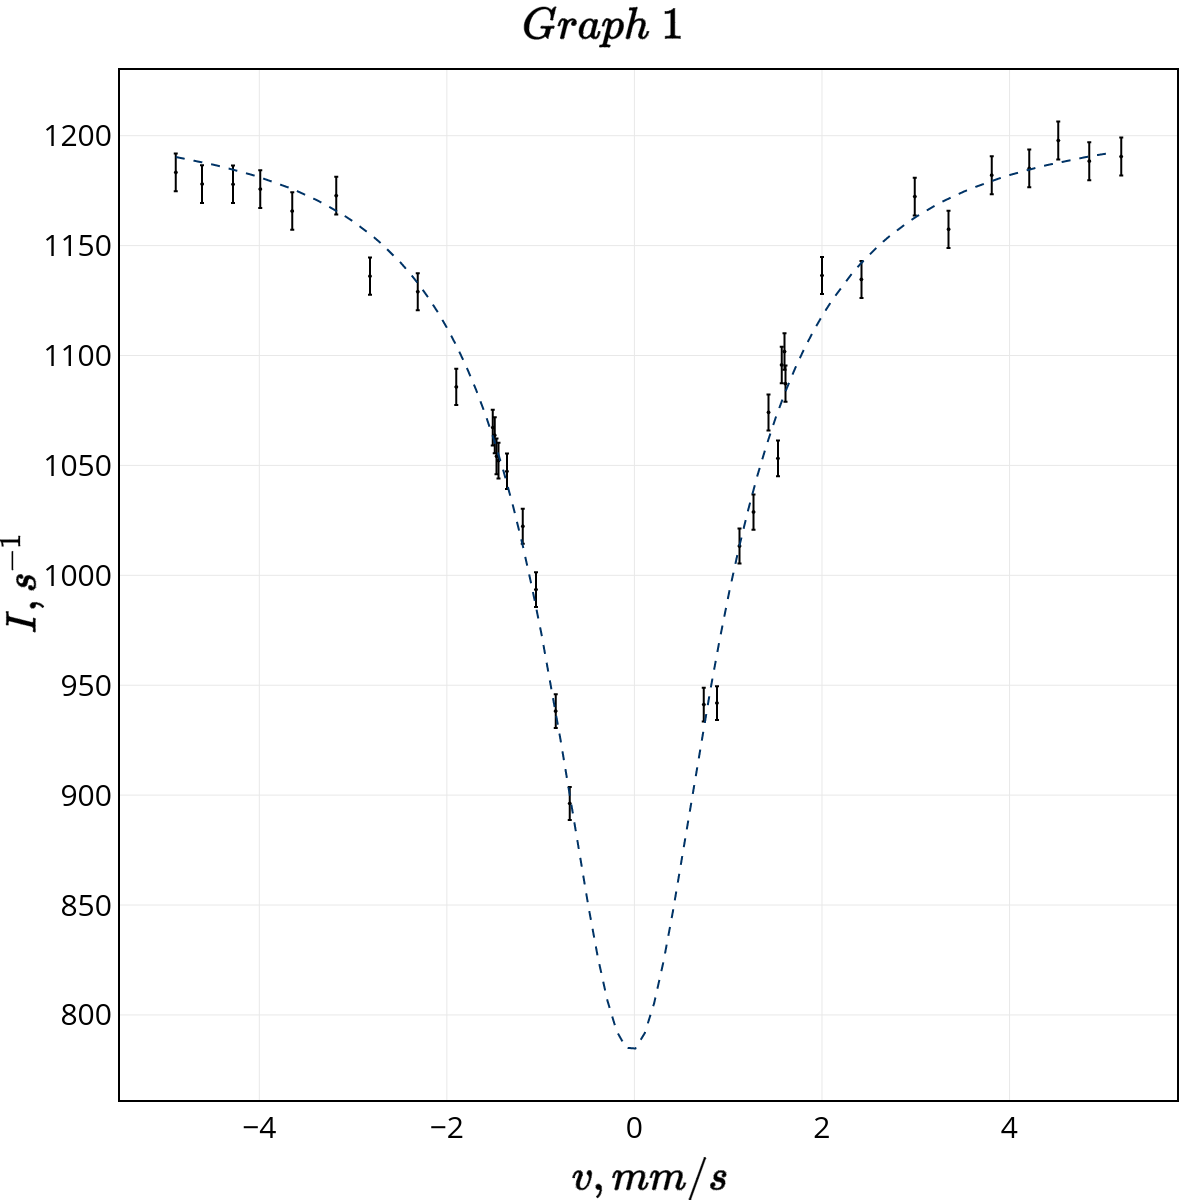

In [138]:
trace1 = go.Scatter(
    x = - data2['v_minus'],
    y = data2['I_minus'],
    mode = 'markers',
    error_y = dict(
        type = 'data',
        array = np.sqrt(data2['I_minus']) * 0.25,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = data2['v_plus'],
    y = data2['I_plus'],
    mode = 'markers',
    error_y = dict(
        type = 'data',
        array = np.sqrt(data2['I_plus']) * 0.25,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace3 = go.Scatter(
    x = np.arange(X.min(), X.max(), 0.1),
    y = f(np.arange(X.min(), X.max(), 0.1), parameters_opt_2[0], parameters_opt_2[1], parameters_opt_2[2]),
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2, trace3]

layout = go.Layout(
    title = "$Graph~1$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$v, mm/s$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$I, s^{-1}$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot2.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot2.png", width=500)

In [137]:
X = np.append(- data2['v_minus'].as_matrix(), data2['v_plus'].as_matrix())
Y = np.append(data2['I_minus'].as_matrix(), data2['I_plus'].as_matrix())
def f(x, a, b, c):
    return 1210 - c * a * a / (np.square(x - b) + a * a)
parameters_opt_2, parameters_cov_2 = opt.curve_fit(f, X, Y)
print(parameters_opt_2)
print(np.sqrt(np.diag(parameters_cov_2)))
print(np.sqrt(np.diag(parameters_cov_2)) / parameters_opt_2)

[  1.06882429e+00  -3.55300372e-02   4.26041635e+02]
[  4.33108383e-02   1.51726489e-02   1.84114718e+01]
[ 0.04052194 -0.42703724  0.04321519]


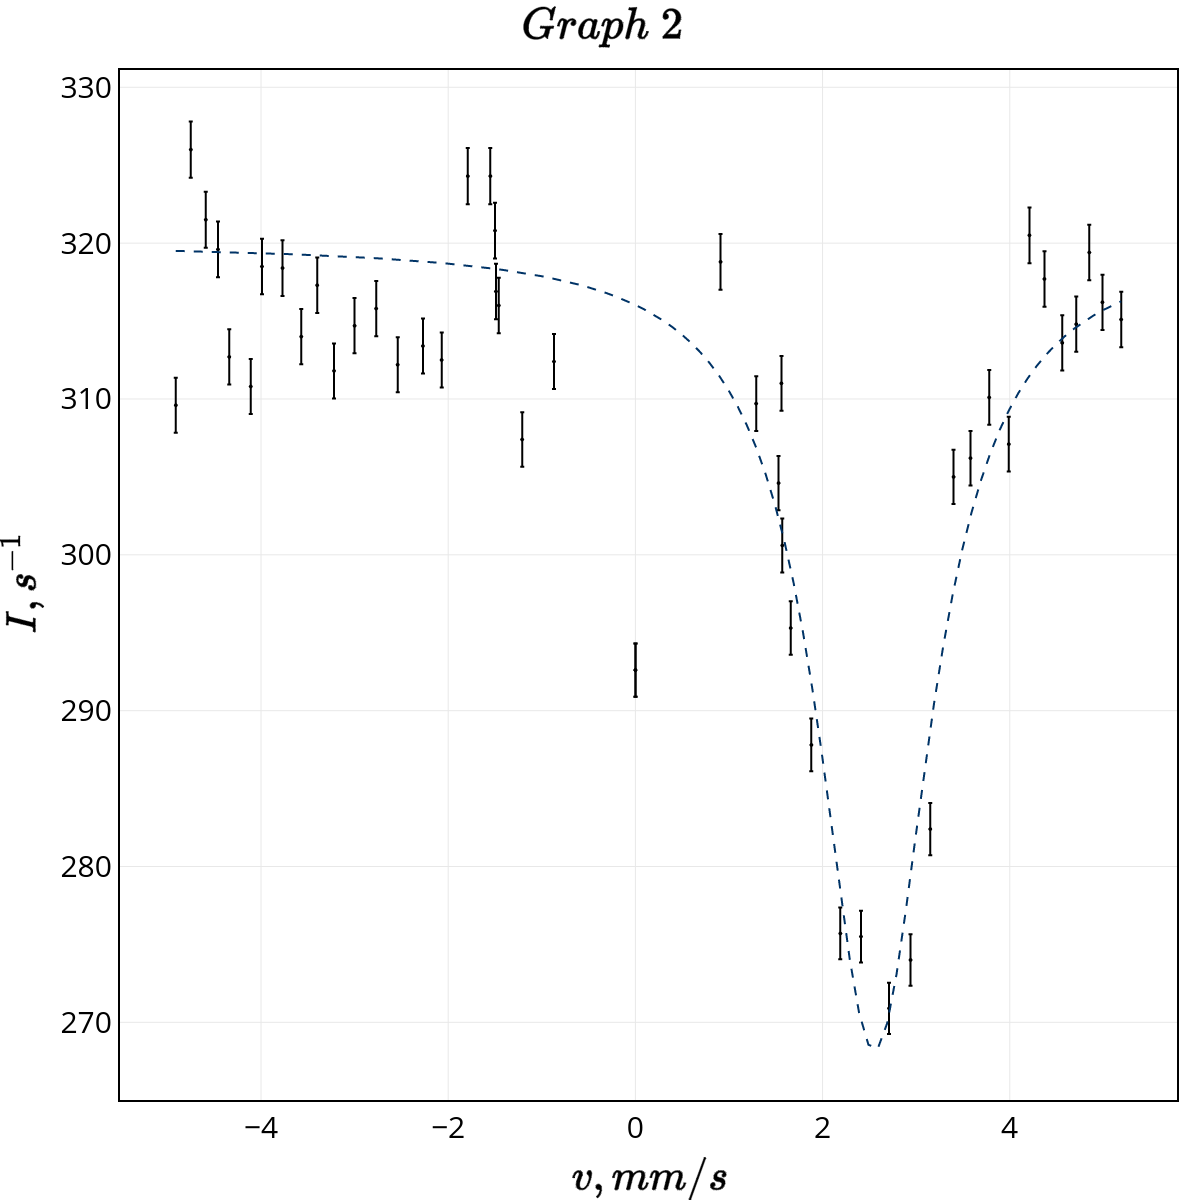

In [140]:
trace1 = go.Scatter(
    x = - data3['v_minus'],
    y = data3['I_minus'],
    mode = 'markers',
    error_y = dict(
        type = 'data',
        array = np.sqrt(data3['I_minus']) * 0.1,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = data3['v_plus'],
    y = data3['I_plus'],
    mode = 'markers',
    error_y = dict(
        type = 'data',
        array = np.sqrt(data3['I_plus']) * 0.1,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace3 = go.Scatter(
    x = np.arange(X.min(), X.max(), 0.1),
    y = f(np.arange(X.min(), X.max(), 0.1), parameters_opt_2[0], parameters_opt_2[1], parameters_opt_2[2]),
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2, trace3]

layout = go.Layout(
    title = "$Graph~2$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$v, mm/s$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$I, s^{-1}$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot3.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot3.png", width=500)

In [139]:
X = np.append(- data3['v_minus'].as_matrix(), data3['v_plus'].as_matrix())
Y = np.append(data3['I_minus'].as_matrix(), data3['I_plus'].as_matrix())
def f(x, a, b, c):
    return 320 - c * a * a / (np.square(x - b) + a * a)
parameters_opt_2, parameters_cov_2 = opt.curve_fit(f, X, Y)
print(parameters_opt_2)
print(np.sqrt(np.diag(parameters_cov_2)))
print(np.sqrt(np.diag(parameters_cov_2)) / parameters_opt_2)

[  0.73490261   2.55266449  51.81385754]
[ 0.09053677  0.06189709  4.85075805]
[ 0.1231956   0.02424803  0.09361893]


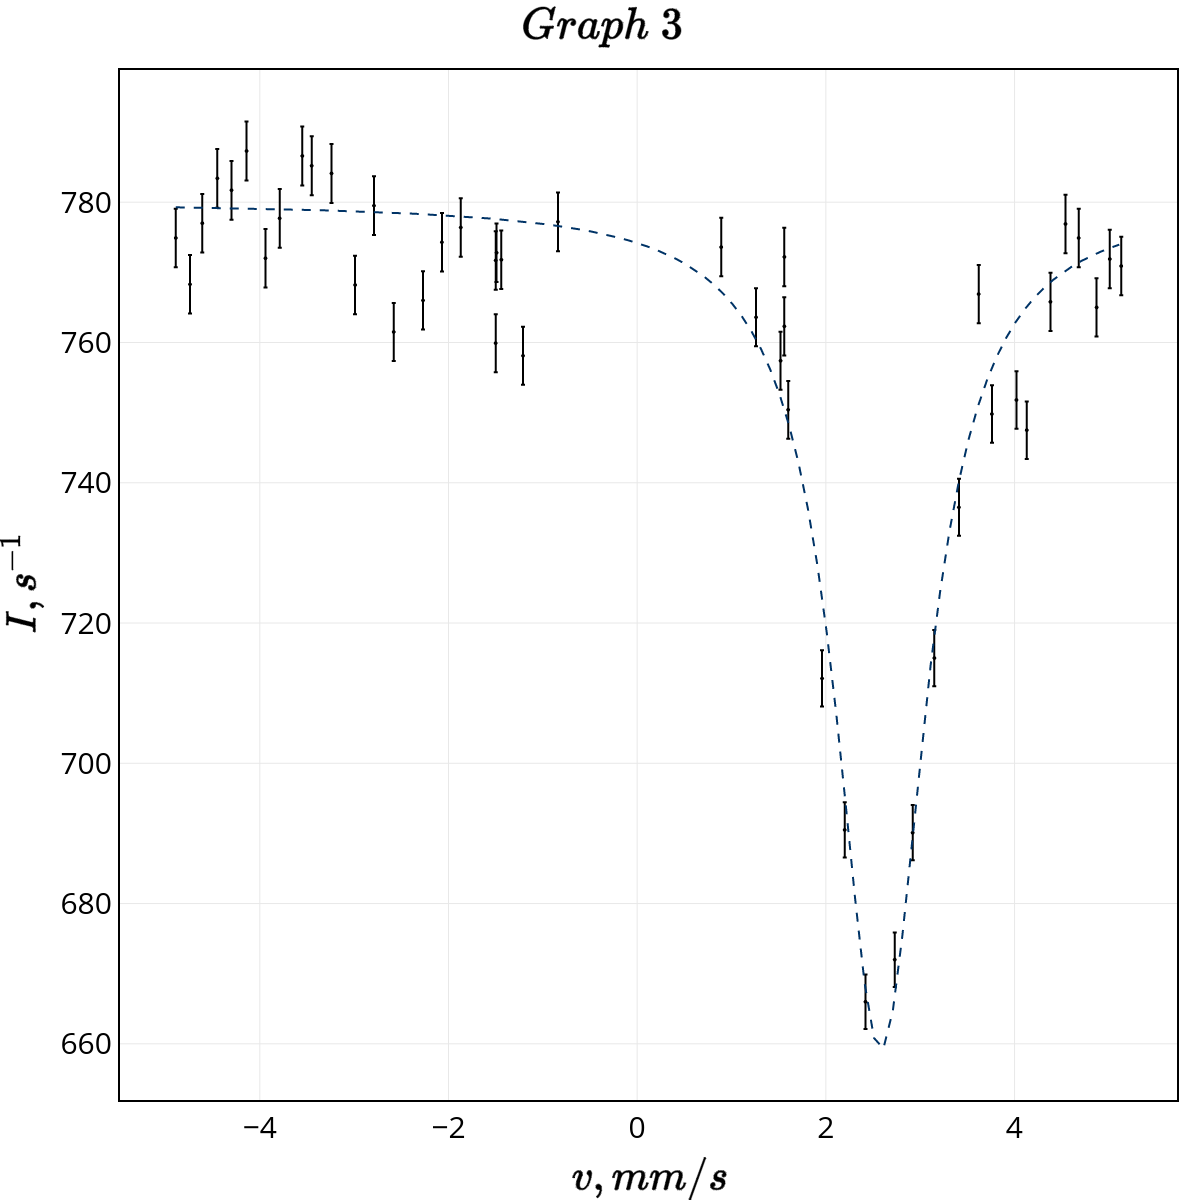

In [142]:
trace1 = go.Scatter(
    x = - data4['v_minus'],
    y = data4['I_minus'],
    mode = 'markers',
    error_y = dict(
        type = 'data',
        array = np.sqrt(data4['I_minus']) * 0.15,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = data4['v_plus'],
    y = data4['I_plus'],
    mode = 'markers',
    error_y = dict(
        type = 'data',
        array = np.sqrt(data4['I_plus']) * 0.15,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace3 = go.Scatter(
    x = np.arange(X.min(), X.max(), 0.1),
    y = f(np.arange(X.min(), X.max(), 0.1), parameters_opt_2[0], parameters_opt_2[1], parameters_opt_2[2]),
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2, trace3]

layout = go.Layout(
    title = "$Graph~3$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$v, mm/s$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$I, s^{-1}$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot4.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot4.png", width=500)

In [141]:
X = np.append(- data4['v_minus'].as_matrix(), data4['v_plus'].as_matrix())
Y = np.append(data4['I_minus'].as_matrix(), data4['I_plus'].as_matrix())
def f(x, a, b, c):
    return 780 - c * a * a / (np.square(x - b) + a * a)
parameters_opt_2, parameters_cov_2 = opt.curve_fit(f, X, Y)
print(parameters_opt_2)
print(np.sqrt(np.diag(parameters_cov_2)))
print(np.sqrt(np.diag(parameters_cov_2)) / parameters_opt_2)

[   0.58023928    2.58120237  120.96610757]
[ 0.04450511  0.02983841  6.97159708]
[ 0.0767013   0.01155989  0.05763265]


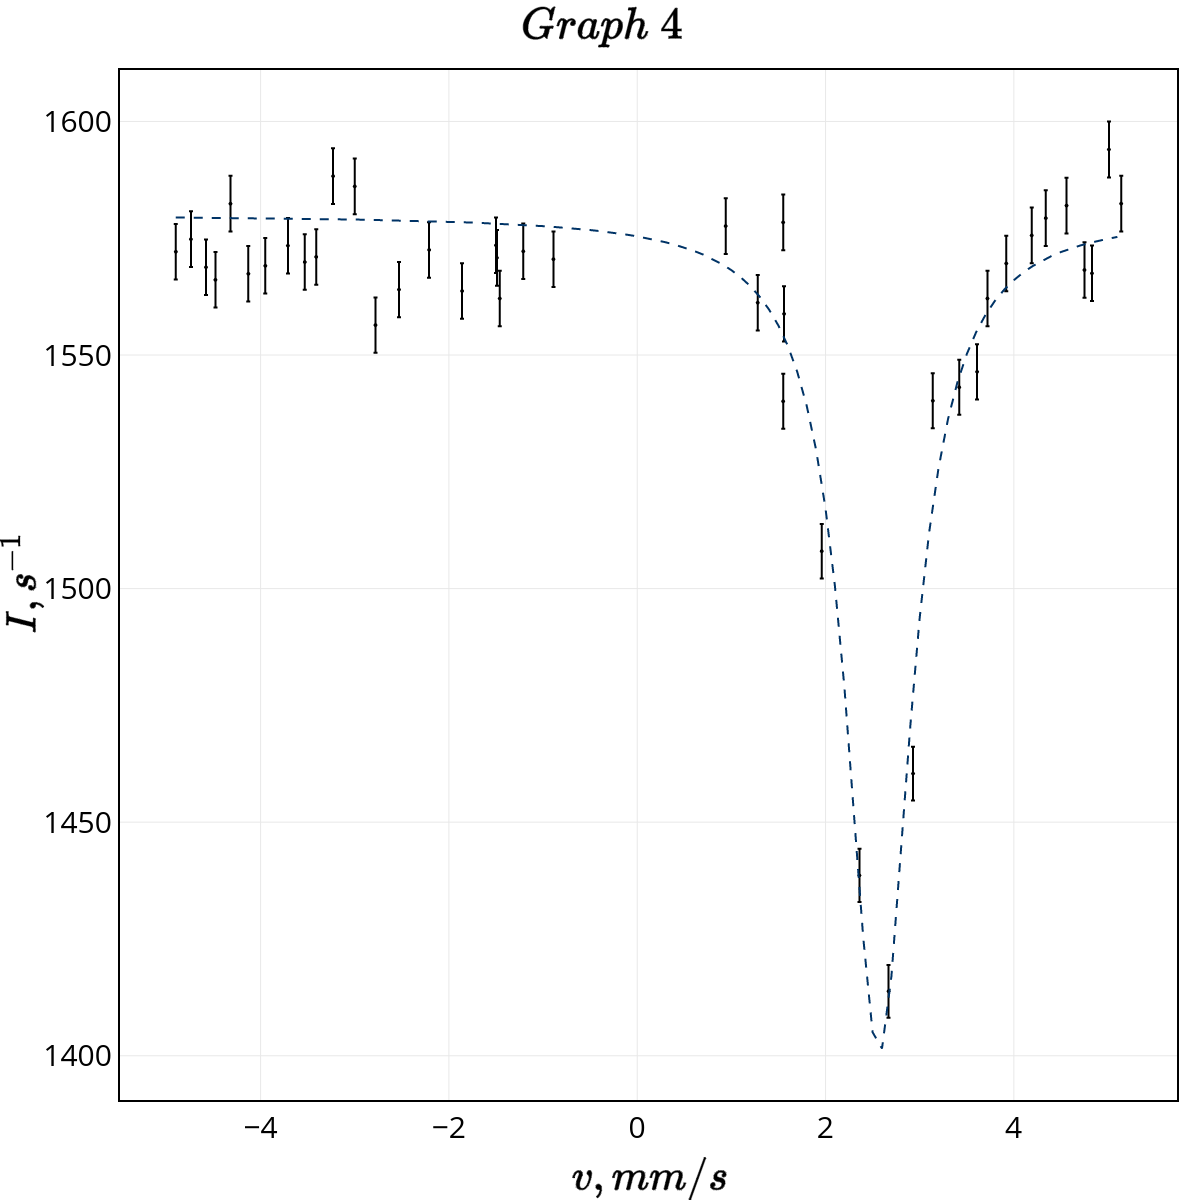

In [144]:
trace1 = go.Scatter(
    x = - data5['v_minus'],
    y = data5['I_minus'],
    mode = 'markers',
    error_y = dict(
        type = 'data',
        array = np.sqrt(data5['I_minus']) * 0.15,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace2 = go.Scatter(
    x = data5['v_plus'],
    y = data5['I_plus'],
    mode = 'markers',
    error_y = dict(
        type = 'data',
        array = np.sqrt(data5['I_plus']) * 0.15,
        visible = True,
        color = '#000000',
        thickness = 2,
        width = 2
    ),
    marker = dict(
        size = 4,
        opacity = 1,
        color = '#000000'
    )
)

trace3 = go.Scatter(
    x = np.arange(X.min(), X.max(), 0.1),
    y = f(np.arange(X.min(), X.max(), 0.1), parameters_opt_2[0], parameters_opt_2[1], parameters_opt_2[2]),
    line = dict(
        color = ('#003366'),
        width = 2,
        dash = 'dash'),
    showlegend = False
)

trace0 = [trace1, trace2, trace3]

layout = go.Layout(
    title = "$Graph~4$",
    width = 1200,
    height = 1200,
    font = dict(
        size = 30,
        color = '#000000'
        ),
    showlegend=False,
    paper_bgcolor = '#ffffff',
    xaxis = dict(
        title = '$v, mm/s$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    yaxis = dict(
        title = '$I, s^{-1}$',
        zeroline = False,
        ticklen = 0,
        color = '#000000',
        mirror = True,
        showline = True,
        linewidth = 2,
        titlefont = dict(
            size = 40,
            color = '#000000' 
            )
    ),
    margin = dict(
        l = 120,
        r = 23,
        t = 70,
        b = 100,
        pad = 0 
    )
    
)

fig = go.Figure(data=trace0, layout=layout)
#py.iplot(figure, filename='basic-error-bar')
py.image.save_as(fig, 'my_plot5.png')
#! open my_plot.png
from IPython.display import Image
Image("my_plot5.png", width=500)

In [143]:
X = np.append(- data5['v_minus'].as_matrix(), data5['v_plus'].as_matrix())
Y = np.append(data5['I_minus'].as_matrix(), data5['I_plus'].as_matrix())
def f(x, a, b, c):
    return 1580 - c * a * a / (np.square(x - b) + a * a)
parameters_opt_2, parameters_cov_2 = opt.curve_fit(f, X, Y)
print(parameters_opt_2)
print(np.sqrt(np.diag(parameters_cov_2)))
print(np.sqrt(np.diag(parameters_cov_2)) / parameters_opt_2)

[   0.41626798    2.56734314  179.54340131]
[  0.03469395   0.02449308  11.17768593]
[ 0.08334522  0.00954025  0.06225618]
